In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure
import cv2

In [4]:
def resize(image, dim, isHeight = True):
    ratio = float(dim) / image.shape[0]
    width = int(ratio * image.shape[1])
    orig = image.copy()
    if isHeight is True:
        return cv2.resize(image, (width, dim))
    else:
        return cv2.resize(image, (dim, width))

In [5]:
image = cv2.imread('work_space/work_space_photo20181119_021501.jpg')
print(image.shape)
orig = image.copy()
resized_image = resize(image, 300)
print(f'New shape: {resized_image.shape}')
#image = imutils.resize(image, height=300)

(480, 640, 3)
New shape: (300, 400, 3)


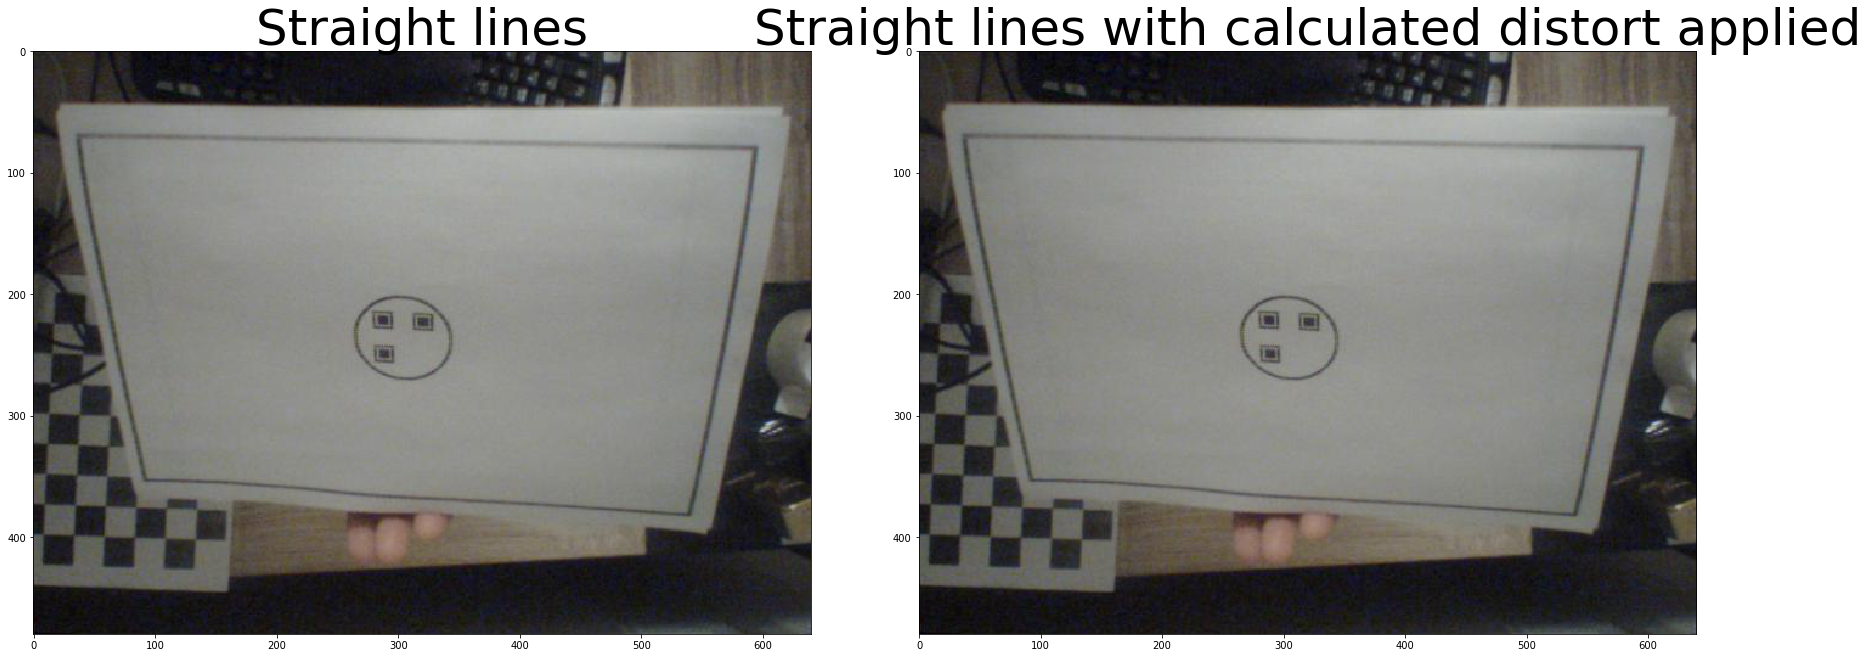

In [6]:
image_path = './work_space/work_space_photo20181119_021501.jpg'
image1 = mpimg.imread(image_path)
image2 = mpimg.imread(image_path)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image1)
ax1.set_title('Straight lines', fontsize=50)
ax2.imshow(image2)
ax2.set_title('Straight lines with calculated distort applied', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

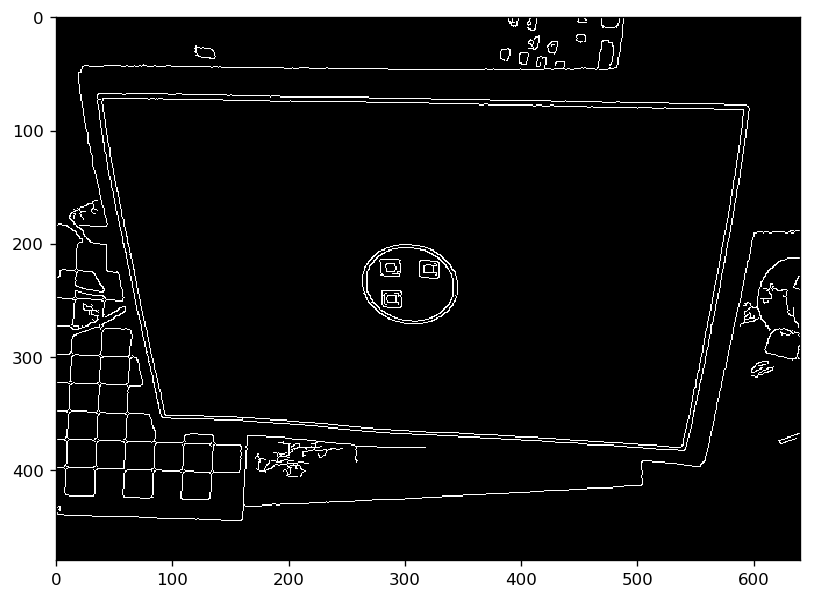

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.bilateralFilter(gray, 5, 5, 5)
edged = cv2.Canny(gray, 0, 220)
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(edged, cmap='gray', aspect='auto', interpolation='nearest')
gray.shape

cv2.imshow('', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

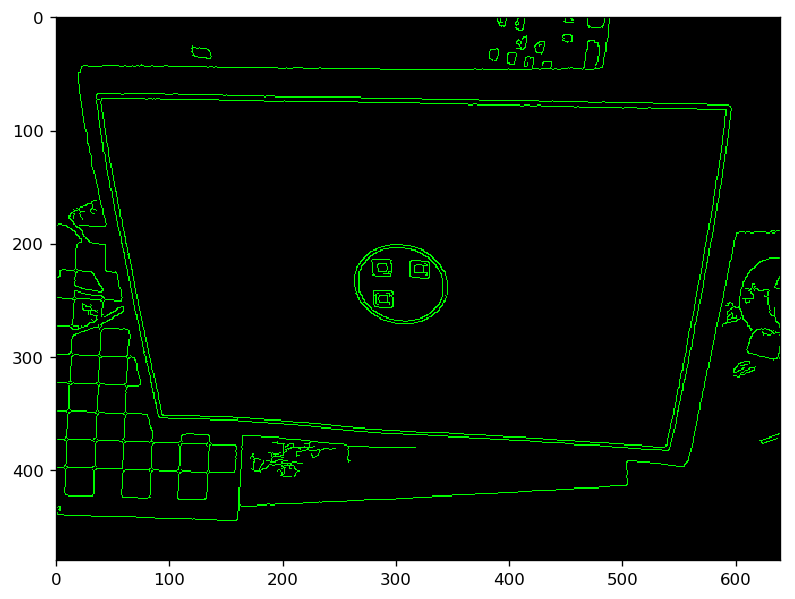

In [8]:
_, cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE,
                                  cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(image)
cv2.drawContours(mask, cnts, -1, (0,255,0), 1)
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(mask)

cv2.imshow('', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
len(cnts)

82

In [10]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

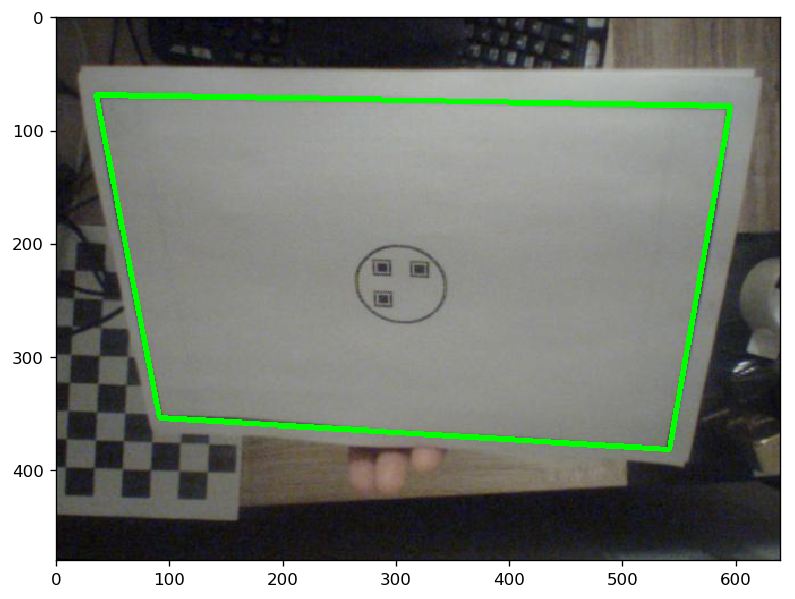

In [11]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]
workSpaceCntr = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        workSpaceCntr = approx
        break
result = image.copy()
cv2.drawContours(result, [workSpaceCntr], -1, (0, 255, 0), 3)

plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(result[:,:,::-1])

cv2.imshow("Work space", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
asd = np.zeros_like(image)
cv2.drawContours(asd, cnts, -1, (0, 255, 0), 1)
cv2.imshow("Image", asd)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
pts = workSpaceCntr.reshape(4, 2)
rect = np.zeros((4, 2), dtype="float32")
pts

array([[ 35,  69],
       [ 91, 354],
       [541, 382],
       [595,  79]], dtype=int32)

In [15]:
 s = pts.sum(axis=1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis=1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]

(tl, tr, br, bl) = rect

In [332]:
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))

dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype="float32")

M = cv2.getPerspectiveTransform(rect, dst)
warp = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))
cv2.imshow('wrap image', warp)
cv2.waitKey(0)

warp = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
warp = exposure.rescale_intensity(warp, out_range=(0, 255))

(thresh, im_bw) = cv2.threshold(warp, 138, 255, cv2.THRESH_BINARY | cv2.THRESH_TRUNC)
im_bw = exposure.rescale_intensity(im_bw, out_range=(0, 255))
kernel = np.ones((2,2), dtype='uint8')
#im_bw = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel)
im_bwOpen = cv2.erode(im_bw,kernel,iterations = 1)
#im_bwOpen = cv2.morphologyEx(im_bw, cv2.MORPH_CLOSE, kernel)
im_bwOpen = cv2.dilate(im_bw,kernel,iterations = 1)
im_bwOpen = cv2.erode(im_bw,kernel,iterations = 1)

cv2.imshow("image", image)
cv2.imshow("edge", edged)
cv2.imshow("warp", warp)
cv2.imshow("im_bw", im_bw)
cv2.imshow("im_bwOpen", im_bwOpen)
cv2.waitKey(0)
cv2.destroyAllWindows()

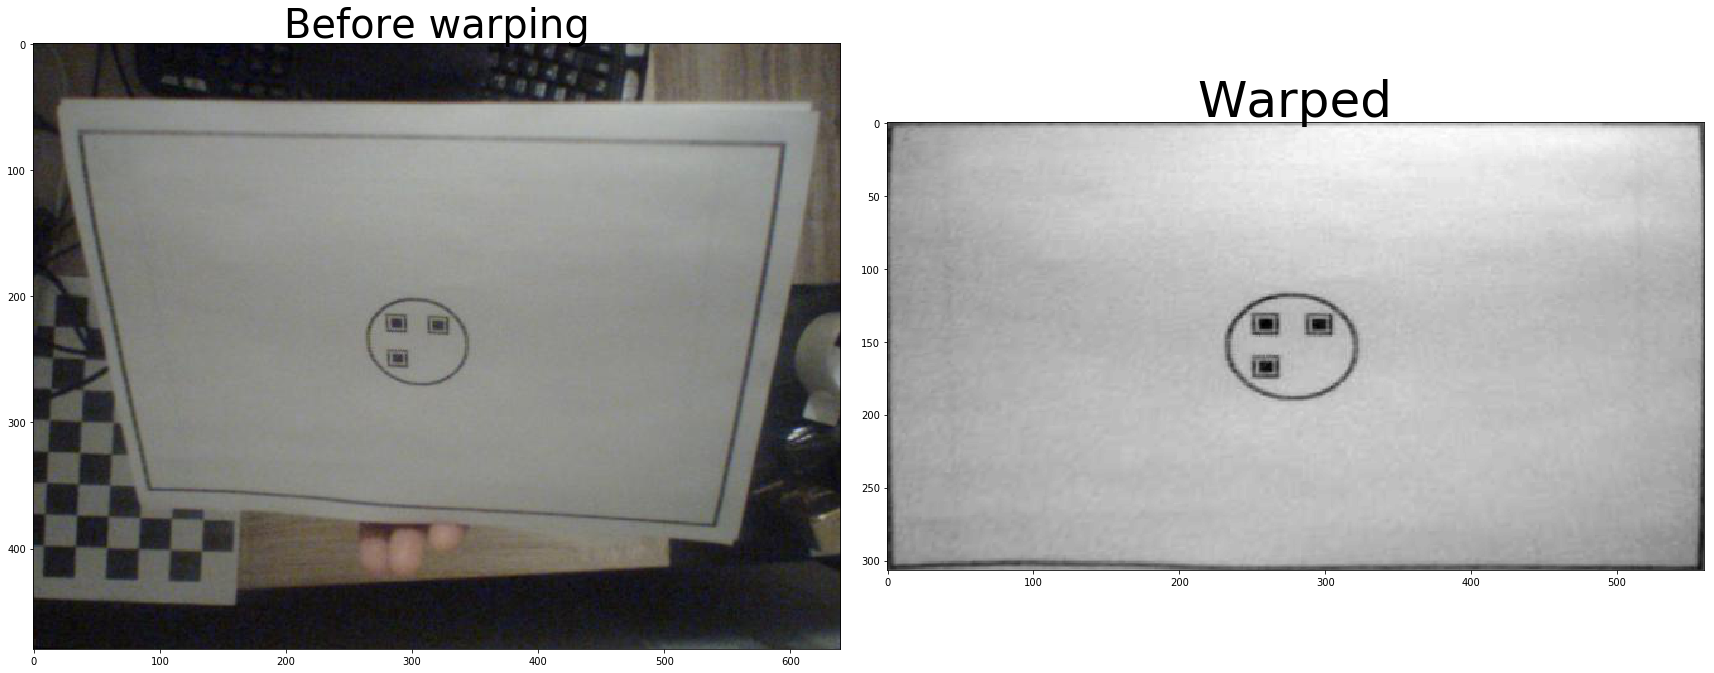

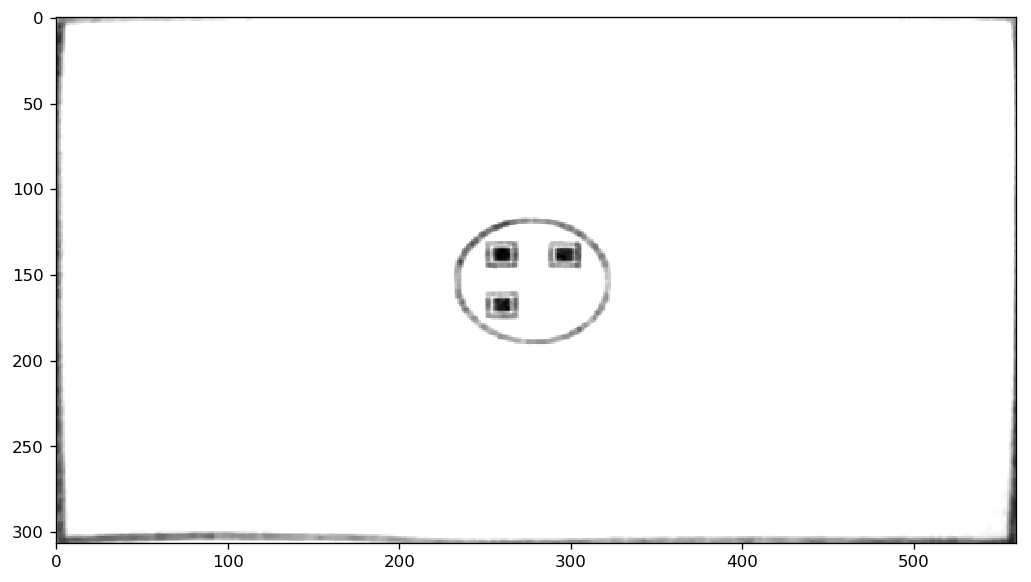

In [334]:
image_path = './work_space/work_space_photo20181119_021501.jpg'
image1 = mpimg.imread(image_path)
image2 = mpimg.imread(image_path)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image1)
ax1.set_title('Before warping', fontsize=40)
ax2.imshow(warp, cmap='gray')
ax2.set_title('Warped', fontsize=50)
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(im_bwOpen, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [79]:
import cv2 as cv
import numpy as np

def nothing(x):pass

cap = cv.VideoCapture(0)
cv.namedWindow('videoUI', cv.WINDOW_NORMAL)
cv.createTrackbar('T','videoUI',0,255,nothing)

while(True):
    ret, frame = cap.read()
    vid_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    thresh = cv.getTrackbarPos('T','videoUI');
    vid_bw = cv.threshold(vid_gray, thresh, 255, cv.THRESH_BINARY)[1]

    cv.imshow('videoUI',cv.flip(vid_bw,1))

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [327]:
import cv2 as cv
import numpy as np
from skimage import exposure

cv.namedWindow('videoUI', cv.WINDOW_NORMAL)
cv.createTrackbar('T','videoUI',0,255,nothing)

while(True):

    thresh = cv.getTrackbarPos('T','videoUI');
    vid_bw = cv.threshold(im_bwOpen, thresh, 255, cv.THRESH_BINARY)[1] # | cv.THRESH_TRUNC)[1]
    vid_bw = exposure.rescale_intensity(vid_bw, out_range=(0, 255))
    cv.imshow('videoUI',cv.flip(vid_bw,1))

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [347]:
cv2.imshow('in', im_bwOpen)
cpy = im_bwOpen.copy()
thresh(cpy, 220)
cv2.imshow('cpy', cpy)
cv2.waitKey(0)
cv.destroyAllWindows()

In [336]:
def thresh(img, thr):
    for i, r in enumerate(img):
        for j, c in enumerate(r):
            img[i,j] = 255 if img[i,j] > thr else 0


In [348]:
a = np.array([[0, 81], [0, 2]], dtype='uint8')

d = np.zeros_like(a)
for i, r in enumerate(d):
    for j, c in enumerate(r):
        d[i,j] = 0